# Sistemas Nebulosos 
# Atividade prática 2 - Parte 2


Matheus Brito Faria 

Número de matricula: 2017074386



---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = [12,7]

# Funções utilizadas

In [ ]:
def trimf(x, a, b, c):
    # assert a < b < c, "a < b < c"

    mu = list()
    for x_i in x:
        if x_i < a:
            mu.append(0)
        elif a <= x_i <= b:
            mu.append((x_i-a)/(b-a))
        elif b <= x_i <= c:
            mu.append((c-x_i)/(c-b))
        elif c < x_i:
            mu.append(0)
        else:
            raise x
    
    return np.array(mu)

def gaussmf(x, sigma, c):
    return np.array([np.exp(-0.5*(((x_i-c)/sigma)**2)) for x_i in x])

def MSE(Y_true, Y_pred):
    return np.square(np.subtract(Y_true,Y_pred)).mean()

# Questão 3

O exerício se baseia em estimar a função seno mostrada a seguir.

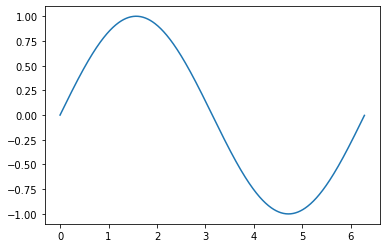

In [ ]:
pi = np.pi
x = np.arange(0, 2*pi, 0.01)
plt.plot(x, np.sin(x))
plt.show()

Para isso foram estipuladas regras em forma de funções do primeiro grau seguindo a seguinte forma:

*   Se x é A1 então y é y1
*   Se x é A2 então y é y2
*   Se x é A3 então y é y3

Onde A1, A2 e A3 serão funções de pertinência definidas em cada experimento e y1, y2, e y2 são as retas definidas como funções na celula abaixo

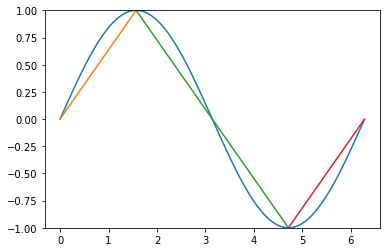

In [ ]:
def y1(x):
    return (2/pi)*x

def y2(x):
    return (-2/pi)*x + 2

def y3(x):
    return (2/pi)*x - 4

plt.plot(x, np.sin(x))
plt.plot(x, y1(x))
plt.plot(x, y2(x))
plt.plot(x, y3(x))
plt.ylim(-1, 1)
plt.show()


## Experimento 1


Foram definidas três funções de pertinência do tipo triangular como mostrado abaixo.

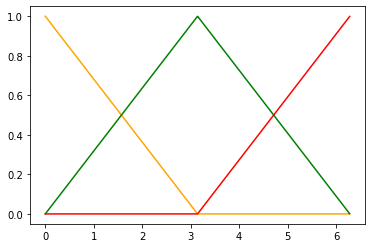

In [ ]:
mu_a_1 = trimf(x, -pi/2, 0, pi)
plt.plot(x, mu_a_1, color='orange')

mu_a_2 = trimf(x, 0, pi, 2*pi)
plt.plot(x, mu_a_2, color='green')

mu_a_3 = trimf(x, pi, 2*pi, 5*pi/2)
plt.plot(x, mu_a_3, color='red')

plt.show()

Aplicando o algoritmo foi possível perceber que apenas três retas formam um resultado muito bom com um erro quadrado médio bem pequeno.

Erro Quadrático Médio = 0.001282839952496189


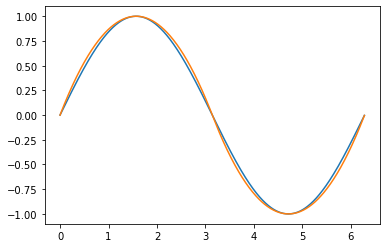

In [ ]:
yy_1 = mu_a_1 * y1(x)
yy_2 = mu_a_2 * y2(x)
yy_3 = mu_a_3 * y3(x)

yy = (yy_1 + yy_2 + yy_3)/(mu_a_1 + mu_a_2 + mu_a_3)

plt.plot(x, np.sin(x))
plt.plot(x, yy)

print("Erro Quadrático Médio =", MSE(np.sin(x), yy))
plt.show()

## Experimento 2

Fazendo o mesmo procedimento do experimento anterior, porém agora usando guassianas como função de pertinência

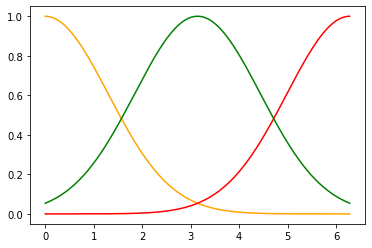

In [ ]:
mu_a_1 = gaussmf(x, 1.3, 0)
plt.plot(x, mu_a_1, color='orange')

mu_a_2 = gaussmf(x, 1.3, pi)
plt.plot(x, mu_a_2, color='green')

mu_a_3 = gaussmf(x, 1.3, 2*pi)
plt.plot(x, mu_a_3, color='red')

plt.show()

Novamente foi encontrado um aproximação satisfatória com um erro um pouco menor que a anterior.

Erro Quadrático Médio = 0.001199325005505572


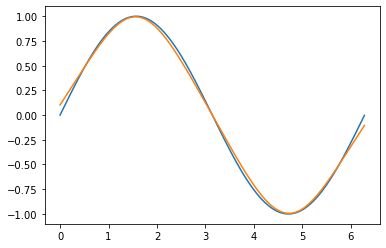

In [ ]:
yy_1 = mu_a_1 * y1(x)
yy_2 = mu_a_2 * y2(x)
yy_3 = mu_a_3 * y3(x)

yy = (yy_1 + yy_2 + yy_3)/(mu_a_1 + mu_a_2 + mu_a_3)

plt.plot(x, np.sin(x))
plt.plot(x, yy)

print("Erro Quadrático Médio =", MSE(np.sin(x), yy))
plt.show()

## Experimento 3

### Usando 5 regras

Foi definida uma função que retorna os coeficinte a e b de uma reta dado dois pontos para facilitar a criação de novas regras.

In [ ]:
def calc_line(p1, p2):
    a = (p1[1] - p2[1]) / (p1[0] - p2[0])
    b = p1[1] - a*p1[0]
    return a, b

Definindo agora cinco regras diferentes.

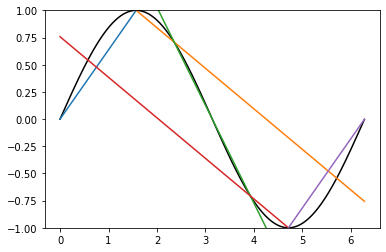

In [ ]:
def y1(x):
    return (2/pi)*x

def y2(x):
    a, b = calc_line([pi/2, 1], [3*pi/4, np.sin(3*pi/4)])
    return a*x + b

def y3(x):
    a, b = calc_line([3*pi/4, np.sin(3*pi/4)], [5*pi/4, np.sin(5*pi/4)])
    return a*x + b

def y4(x):
    a, b = calc_line([5*pi/4, np.sin(5*pi/4)], [6*pi/4, np.sin(6*pi/4)])
    return a*x + b

def y5(x):
    return (2/pi)*x - 4

plt.plot(x, np.sin(x), color='black')
plt.plot(x, y1(x))
plt.plot(x, y2(x))
plt.plot(x, y3(x))
plt.plot(x, y4(x))
plt.plot(x, y5(x))
plt.ylim(-1, 1)
plt.show()

Foi definido também cinco novas funções de pertinência, todas usando gaussianas.

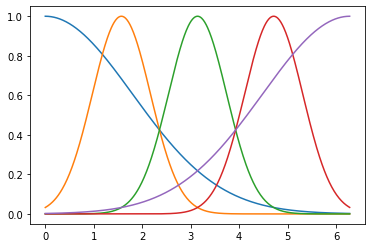

In [ ]:
c = 0.6
s = 1.2

mu_a_1 = gaussmf(x, c+s, 0)
plt.plot(x, mu_a_1)

mu_a_2 = gaussmf(x, c, pi/2)
plt.plot(x, mu_a_2)

mu_a_3 = gaussmf(x, c, pi)
plt.plot(x, mu_a_3)

mu_a_4 = gaussmf(x, c, 3*pi/2)
plt.plot(x, mu_a_4)

mu_a_5 = gaussmf(x, c+s, 2*pi)
plt.plot(x, mu_a_5)

plt.show()

Aplicando o algoritmo é possível perceber que a função ficou um pouco pior, isso ocorre pois ao utilizar mais regras aumentamos o grau das funções que podemos representar.

Porém esse aumento da ordem das funções torna cria alguns comportamentos não esperados, como algumas ondulações no pico e no vale do senoide.

Erro Quadrático Médio = 0.0010988835425789255


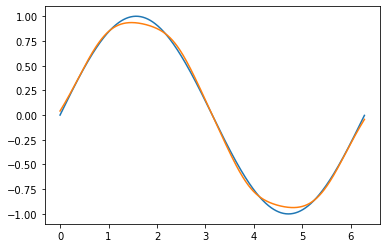

In [ ]:
yy_1 = mu_a_1 * y1(x)
yy_2 = mu_a_2 * y2(x)
yy_3 = mu_a_3 * y3(x)
yy_4 = mu_a_4 * y4(x)
yy_5 = mu_a_5 * y5(x)

yy = (yy_1 + yy_2 + yy_3 + yy_4 + yy_5)/(mu_a_1 + mu_a_2 + mu_a_3 + mu_a_4 + mu_a_5)

plt.plot(x, np.sin(x))
plt.plot(x, yy)

print("Erro Quadrático Médio =", MSE(np.sin(x), yy))
plt.show()

### Usando 10 regras

Foi definido, em cima da função de interesse, todos os pontos que darão origem às retas.

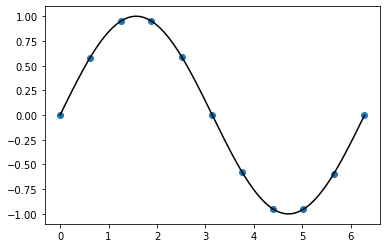

In [ ]:
idx = np.linspace(0, len(x)-1, 11).astype(int)

plt.plot(x, np.sin(x), color='black')
plt.scatter(x[idx], np.sin(x[idx]))

plt.show()

Dessa forma a partir de dois pontos vizinhos foi gerado uma reta.

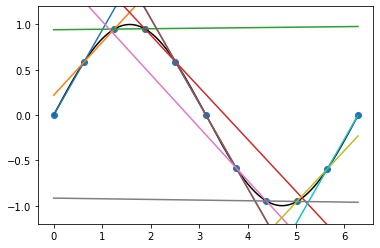

In [ ]:
y_lines = list()
for i in range(1, len(idx)):
    a, b = calc_line([x[idx[i-1]], np.sin(x[idx[i-1]])], [x[idx[i]], np.sin(x[idx[i]])])
    y_lines.append([a*x_i+b for x_i in x])

y_lines = np.array(y_lines)

plt.plot(x, np.sin(x), color='black')
plt.scatter(x[idx], np.sin(x[idx]))
for line in y_lines:
    plt.plot(x, line)

plt.ylim(-1.2, 1.2)
plt.show()

Para cada uma dessas retas foi gerada uma função de pertinência usando gaussianas.

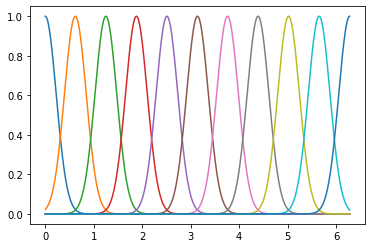

In [ ]:
c = 0.225
mu_list = [gaussmf(x, c, x[i]) for i in idx]

for mu in mu_list:
    plt.plot(x, mu)

Ao gerar o função, percebe-se o mesmo problema de usar 5 regras. O aumento da ordem que é possivel gerar acaba piorando um pouco a formulação da função.

Erro Quadrático Médio = 0.001954898643829281


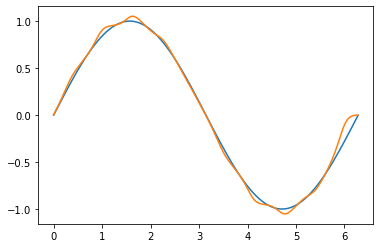

In [ ]:
mu_y = [np.multiply(mu_list[i], y_lines[i]) for i in range(len(y_lines))]

mu_y = np.array(mu_y)
mu_list = np.array(mu_list)

yy = mu_y.sum(axis=0) / mu_list.sum(axis=0)

plt.plot(x, np.sin(x))
plt.plot(x, yy)

print("Erro Quadrático Médio =", MSE(np.sin(x), yy))
plt.show()

# Questão 4

In [ ]:
x = np.arange(0, 25, 0.1)

### Funções de pertinência da comida

Foram geradas funções de pertiência para a comida usando gaussianas.



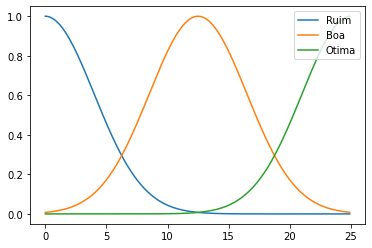

In [ ]:
c = 4
comida_ruim = gaussmf(x,c,0)
comida_boa = gaussmf(x,c,12.5)
comida_otima = gaussmf(x,c,25.0)

plt.plot(x,comida_ruim, label="Ruim")
plt.plot(x,comida_boa, label="Boa")
plt.plot(x,comida_otima, label="Otima")
plt.legend(loc="upper right")
plt.show()

### Funções de pertiência do serviço

Foram geradas funções de pertiência para o serviço usando gaussianas.

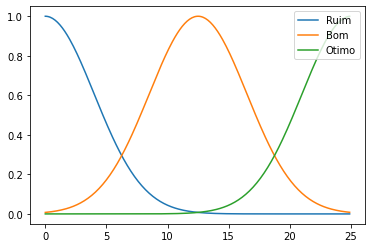

In [ ]:
c = 4
servico_ruim = gaussmf(x,c,0)
servico_bom = gaussmf(x,c,12.5)
servico_otimo = gaussmf(x,c,25.0)

plt.plot(x,servico_ruim, label="Ruim")
plt.plot(x,servico_bom, label="Bom")
plt.plot(x,servico_otimo, label="Otimo")
plt.legend(loc="upper right")
plt.show()

### Regras de gorjeta

Gerando regras para a gorjeta, no caso foram usadas três retas

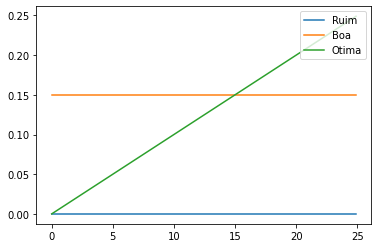

In [ ]:
gorjeta_ruim = trimf(x,-15,0,25) * 0
gorjeta_boa = np.ones(x.shape) * 0.15
gorjeta_otima = trimf(x,0,25,50) * 0.25

plt.plot(x,gorjeta_ruim, label="Ruim")
plt.plot(x,gorjeta_boa, label="Boa")
plt.plot(x,gorjeta_otima, label="Otima")
plt.legend(loc="upper right")
plt.show()

Definindo as condições if-then

In [ ]:
mu_a_1 = np.fmax(servico_ruim, comida_ruim)
mu_a_2 = servico_bom
mu_a_3 = np.fmax(servico_otimo, comida_otima)

Gerando a função da gorjeta.



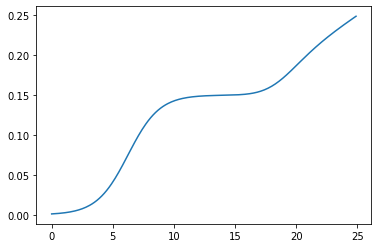

In [ ]:
yy_1 = mu_a_1 * gorjeta_ruim
yy_2 = mu_a_2 * gorjeta_boa 
yy_3 = mu_a_3 * gorjeta_otima

yy = (yy_1 + yy_2 + yy_3)/(mu_a_1 + mu_a_2 + mu_a_3)

plt.plot(x, yy)
plt.show()